In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
ad_data = pd.read_csv('C:/Users/user/OneDrive/Desktop/KAG_conversion_data.csv')

In [3]:
ad_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# Exploratory Data Analysis

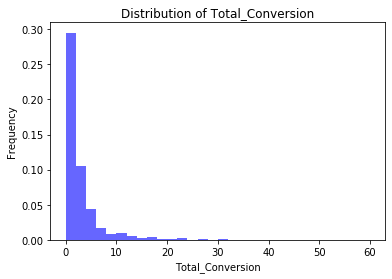

In [6]:
plt.hist(ad_data['Total_Conversion'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Total_Conversion')
plt.xlabel('Total_Conversion')
plt.ylabel('Frequency')
plt.show()

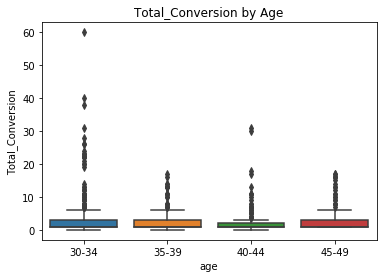

In [7]:
sns.boxplot(x='age', y='Total_Conversion', data=ad_data)
plt.title('Total_Conversion by Age')
plt.show()

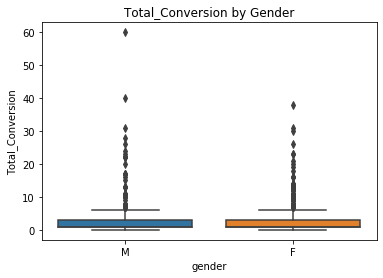

In [8]:
sns.boxplot(x='gender', y='Total_Conversion', data=ad_data)
plt.title('Total_Conversion by Gender')
plt.show()

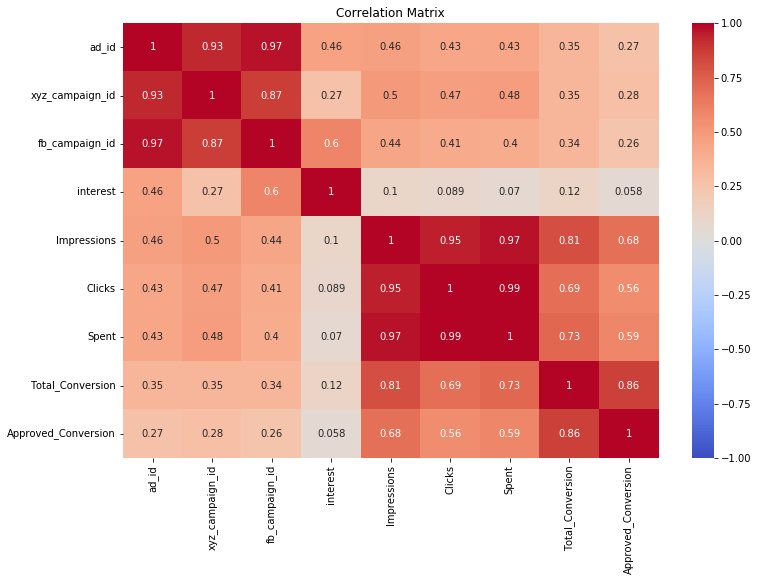

In [9]:
correlation_matrix = ad_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

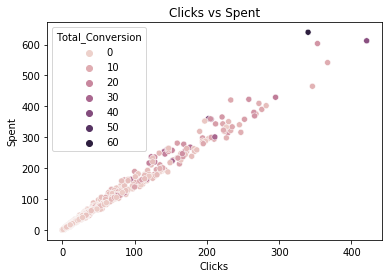

In [10]:
sns.scatterplot(x='Clicks', y='Spent', data=ad_data, hue='Total_Conversion')
plt.title('Clicks vs Spent')
plt.show()

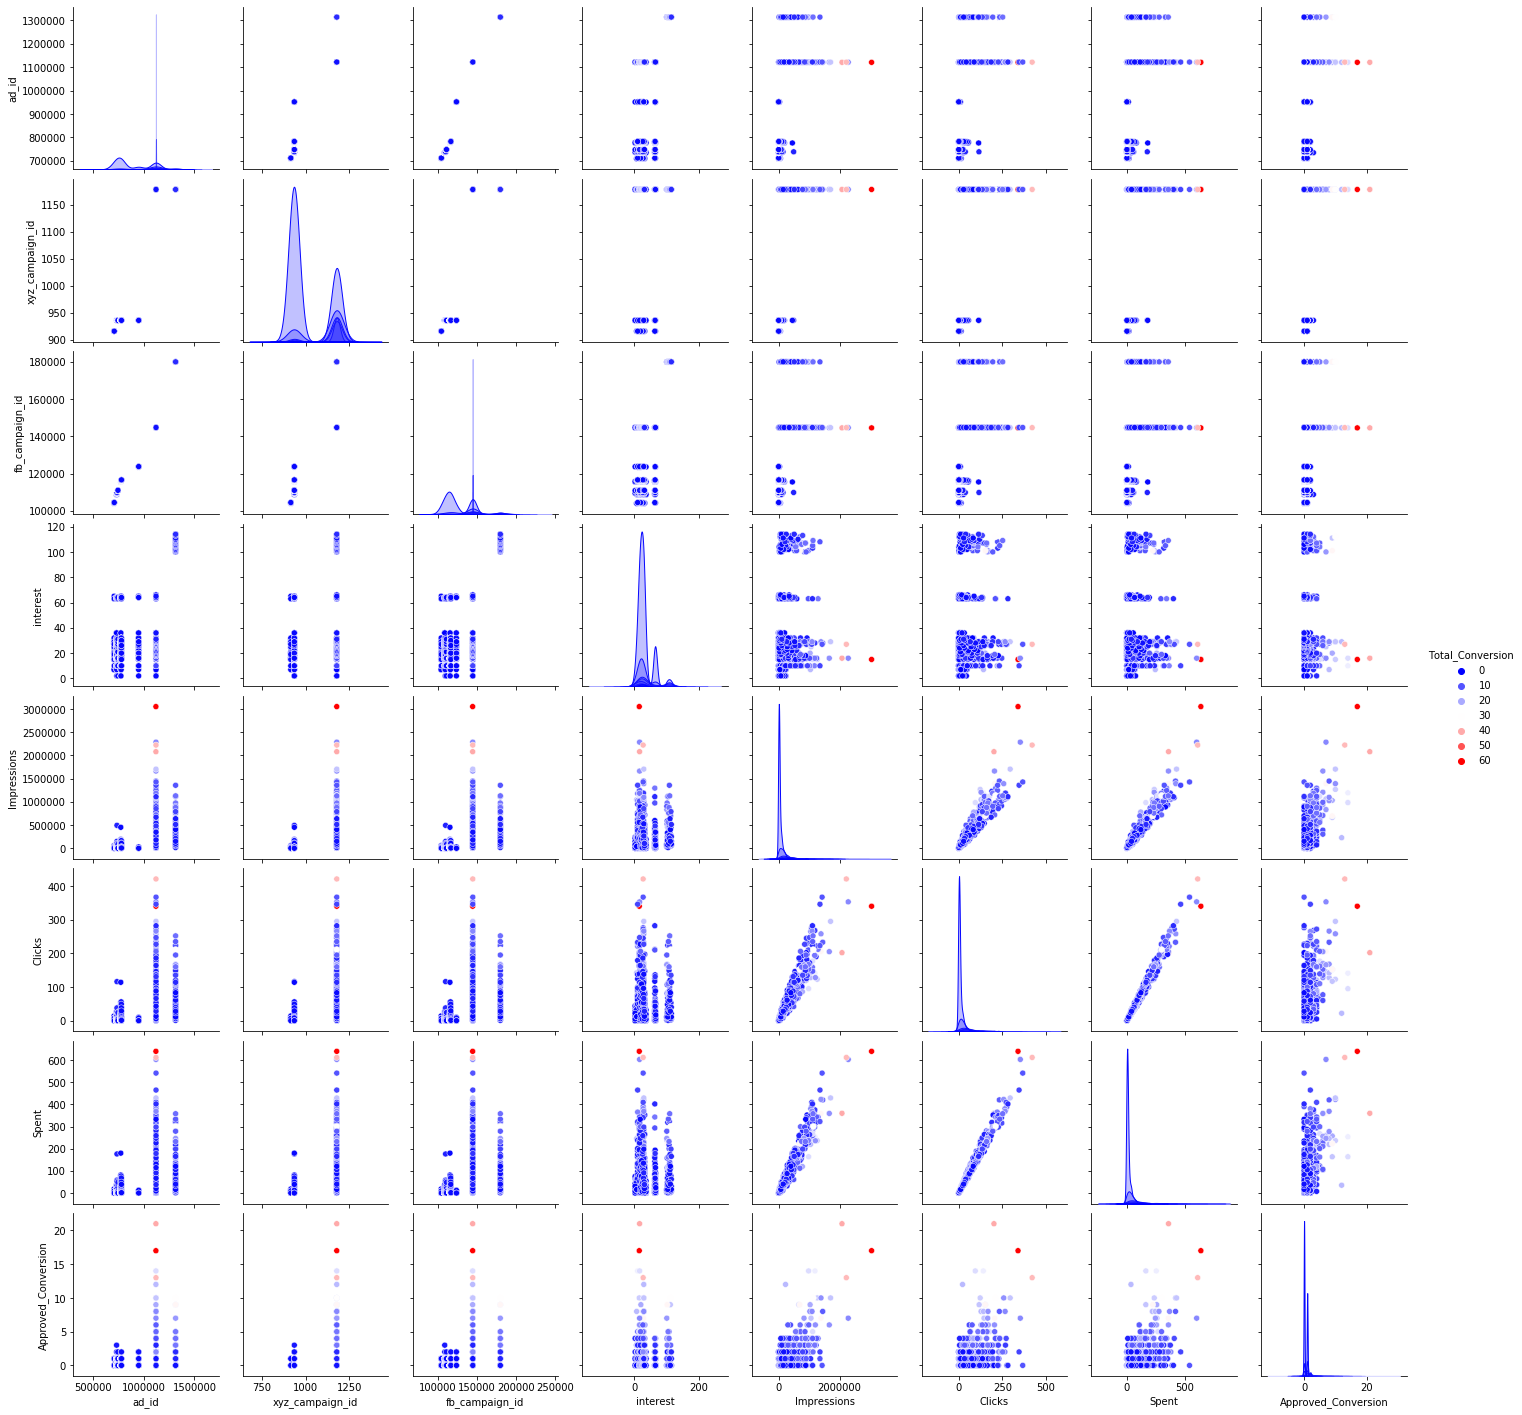

In [11]:

warnings.filterwarnings('ignore')

sns.pairplot(ad_data, hue='Total_Conversion', palette='bwr')
plt.show()

warnings.resetwarnings()

# Logistic Regression without PCA

In [12]:
ad_data = pd.get_dummies(ad_data, columns=['age', 'gender'])

X = ad_data.drop(['Total_Conversion'], axis=1)
y = ad_data['Total_Conversion']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

warnings.filterwarnings('ignore')

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression without PCA and with scaling")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

warnings.resetwarnings()

Logistic Regression without PCA and with scaling
Confusion Matrix:
[[142   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 18   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 12   4   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  3   3   1   1   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   3   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   2   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   1   1   0   0   0   2   0   0   0   0
    0   0

### This indicates that the advertising campaign is moderately effective in generating total conversions based on the available features, with an accuracy score of approximately 66% without PCA.

In [13]:
variance_ratios = []
for n_components in range(1, len(ad_data.columns)):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    variance_ratios.append(sum(pca.explained_variance_ratio_))
    
max_variance_ratio = max(variance_ratios)
max_variance_ratio_n_components = variance_ratios.index(max_variance_ratio) + 1
print("Maximum variance ratio:", max_variance_ratio)
print("Number of components for maximum variance ratio:", max_variance_ratio_n_components)


Maximum variance ratio: 1.0000000000000002
Number of components for maximum variance ratio: 12


 # Applying PCA


### Scaling the Data and applying PCA

In [14]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print(X_test_pca)

[[-1.98370503 -0.71154931  1.21247167 ... -0.23882281  1.66825678
  -0.46954454]
 [ 2.04336874 -2.67133373 -1.52246822 ... -1.51586462  1.30666518
   0.38144501]
 [-2.23158307 -0.51945906  1.5747774  ... -0.07579873  0.09356727
  -0.61837454]
 ...
 [-2.27451774 -0.75251349  0.84238198 ... -0.31531464  0.63801657
  -0.41661097]
 [-2.12376047  1.62561777 -0.06744317 ... -0.18553901 -0.2664765
  -0.25732666]
 [ 2.4068691   1.24034858 -0.35556708 ...  2.3656499   0.16434082
   2.34624976]]


#### Note : Even though Number of components required for maximum variance ratio is 12 , considering only the first 8 components for dimensionality reduction. 

In [15]:
X_scaled.shape

(1143, 14)

In [16]:
X_pca.shape

(1143, 8)

In [17]:
print(pca.components_)

[[ 0.37294422  0.36874569  0.36655696  0.16620923  0.40224072  0.39344355
   0.39600035  0.27635377 -0.07944137  0.00094648  0.02807628  0.0648517
   0.03050207 -0.03050207]
 [-0.2724777  -0.24476681 -0.27670573 -0.19758782  0.17842184  0.24159468
   0.22452738  0.10985107  0.00477523 -0.12111658 -0.02460158  0.1364945
   0.53086154 -0.53086154]
 [-0.23407054 -0.14888533 -0.28200285 -0.36877319  0.25632633  0.18788309
   0.22337577  0.33068939  0.2363482  -0.10564724 -0.16910268 -0.01253378
  -0.41922237  0.41922237]
 [ 0.0985933   0.0582036   0.11139737  0.15745328 -0.01904162 -0.09135675
  -0.08881277  0.13725355  0.75177037 -0.29227379 -0.14096954 -0.4501271
   0.14350337 -0.14350337]
 [-0.03979604 -0.01760915 -0.05581425 -0.08685107  0.06783996  0.02164453
   0.03087516  0.13556625 -0.07032     0.78283216 -0.13960976 -0.56040967
   0.07656583 -0.07656583]
 [-0.04790555 -0.01550517 -0.05744267 -0.12578638  0.04225703  0.03373303
   0.03698221  0.06103103 -0.12877554 -0.20376093  0.8

So, the first principal component can be written as

PC_1 : 0.37294422*X1 + 0.36874569*X2 + 0.36655696*X3 + 0.16620923*X4 + 0.40224072*X5 + 0.39344355*X6 + 0.39600035*X7 +  0.27635377*X8 + -0.07944137*X9 + 0.00094648*X10 + 0.02807628*X11 + 0.0648517*X12 + 0.03050207*X13 + -0.03050207*X14

In [18]:
feature_names = X.columns
pcs = pca.components_
features = [(feature_names[i], w[0]) for i, w in enumerate(pcs.T)]
features_sorted = sorted(features, key=lambda x: abs(x[1]), reverse=True)
features_str = [f'{f} ({round(w, 2)})' for f, w in features_sorted]

print("The 12 features selected by PCA are:")
print(features_str[:12])

The 12 features selected by PCA are:
['Impressions (0.4)', 'Spent (0.4)', 'Clicks (0.39)', 'ad_id (0.37)', 'xyz_campaign_id (0.37)', 'fb_campaign_id (0.37)', 'Approved_Conversion (0.28)', 'interest (0.17)', 'age_30-34 (-0.08)', 'age_45-49 (0.06)', 'gender_F (0.03)', 'gender_M (-0.03)']


These 8 features contribute around 99 percent of the variance of the data.

In [19]:
X_scaled

array([[-1.43632663, -1.24516442, -1.45759092, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       [-1.43631116, -1.24516442, -1.45754212, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       [-1.4361977 , -1.24516442, -1.45739572, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       ...,
       [ 1.68714534,  0.90986308,  2.2543676 , ...,  1.84746513,
         1.03653758, -1.03653758],
       [ 1.68715566,  0.90986308,  2.2544652 , ...,  1.84746513,
         1.03653758, -1.03653758],
       [ 1.68716082,  0.90986308,  2.254514  , ...,  1.84746513,
         1.03653758, -1.03653758]])

In [20]:
X_pca

array([[-2.52315575, -0.15228182,  2.06214593, ...,  0.02358826,
         0.36149032, -0.19595218],
       [-2.65384523, -0.21162233,  1.87097952, ..., -0.01404133,
         0.21996939, -0.68000119],
       [-2.67329411, -0.26402975,  1.79079368, ..., -0.03701321,
         0.33256746, -0.68095017],
       ...,
       [ 2.22095318, -0.58687138, -3.43045295, ..., -1.69936304,
         1.10473883,  0.08515232],
       [ 4.83580281,  0.75348224, -1.79252074, ..., -1.42118544,
         1.74458604, -0.50058451],
       [ 4.18929305,  0.41322387, -2.18790983, ..., -1.48985976,
         1.69186522, -0.12554893]])

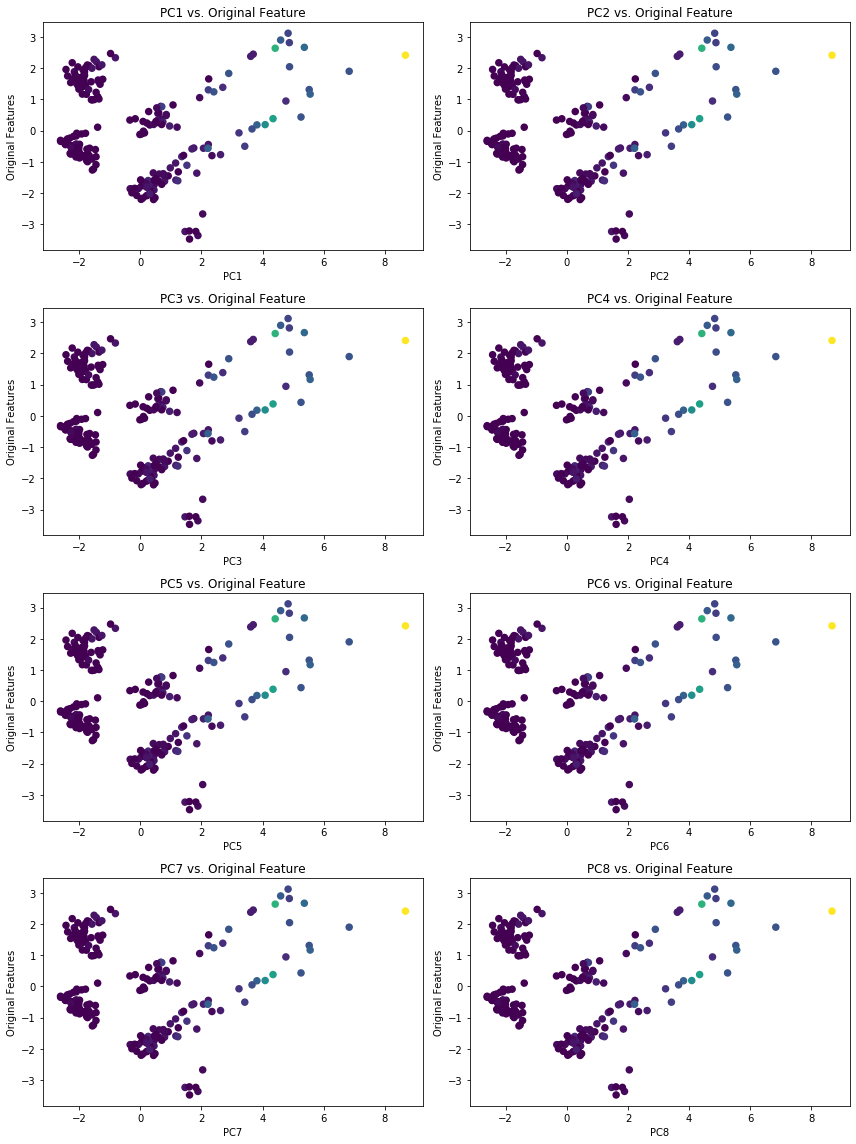

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
ax = ax.ravel()
for i in range(8):
    ax[i].scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, linewidth=1.5)
    ax[i].set_title(f'PC{i+1} vs. Original Feature')
    ax[i].set_xlabel(f'PC{i+1}')
    ax[i].set_ylabel('Original Features')
plt.tight_layout()
plt.show()

# Logistic Regression with PCA

In [22]:
warnings.filterwarnings('ignore')

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = log_reg_pca.predict(X_test_pca)
print("\nLogistic Regression with PCA")
print("Confusion Matrix:")
print(confusion_matrix(y_test_pca, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test_pca, y_pred_pca))
print("\nAccuracy Score:")
print(accuracy_score(y_test_pca, y_pred_pca))

warnings.resetwarnings()


Logistic Regression with PCA
Confusion Matrix:
[[142   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 19   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 13   3   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  2   4   1   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   3   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1   0   1   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1   2   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   1   0   1   1   0   0   0   2   0 

# Conclusion

### This indicates that the advertising campaign is moderately effective in generating total conversions based on the available features, with an accuracy score of approximately 67.2% when PCA is applied.

### This means rather than basing the advertisements off all 14 features , they can concentrate more on making advertisements based on the 8 features majorly and make some small increase in effectiveness of the advertisement campaigns.Rather than this small increase in effectiveness of advertising campaign, steps could be taken to consider new factors that maybe more helpful for increasing the effectiveness of advertising campaigns.